In [17]:
import pandas as pd
import numpy as np

from pydataset import data

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
data('voteincome', show_doc=True)

voteincome

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Sample Turnout and Demographic Data from the 2000 Current Population Survey

### Description

This data set contains turnout and demographic data from a sample of
respondents to the 2000 Current Population Survey (CPS). The states
represented are South Carolina and Arkansas. The data represent only a sample
and results from this example should not be used in publication.

### Usage

    data(voteincome)

### Format

A data frame containing 7 variables ("state", "year", "vote", "income",
"education", "age", "female") and 1500 observations.

`state`

a factor variable with levels equal to "AR" (Arkansas) and "SC" (South
Carolina)

`year`

an integer vector

`vote`

an integer vector taking on values "1" (Voted) and "0" (Did Not Vote)

`income`

an integer vector ranging from "4" (Less than \$5000) to "17" (Greater than
\$75000) denoting family income. See the CPS codebook for more info

## Get df and drop unwanted columns

In [6]:
df = data('voteincome')

In [7]:
df.head()

,state,year,vote,income,education,age,female
1,AR,2000,1,9,2,73,0
2,AR,2000,1,11,2,24,0
3,AR,2000,0,12,2,24,1
4,AR,2000,1,16,4,40,0
5,AR,2000,1,10,4,85,1


In [9]:
df = df.drop(columns=['state', 'year'])

In [23]:
df.describe()

,vote,income,education,age,female
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.855333,12.464000,2.651333,49.261333,0.559333
std,0.351882,3.915643,1.021009,17.471134,0.496633
min,0.000000,4.000000,1.000000,18.000000,0.000000
25%,1.000000,9.000000,2.000000,36.000000,0.000000
50%,1.000000,13.000000,3.000000,49.000000,1.000000
75%,1.000000,16.000000,4.000000,62.000000,1.000000
max,1.000000,17.000000,4.000000,85.000000,1.000000


## Create X and y

In [11]:
y = df[['vote']]
X = df.drop(columns='vote')

In [24]:
print(y.shape)
print(X.shape)

(1500, 1)
(1500, 4)


## Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1050, 4)
(1050, 1)
(450, 4)
(450, 1)


## 4 Neighbors

In [55]:
knn4 = KNeighborsClassifier(n_neighbors=4)

In [56]:
knn4.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [57]:
y_pred4 = knn4.predict(X_train)

In [58]:
y_pred4_proba = knn4.predict_proba(X_train)
y_pred4_proba[:5]

array([[0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0.5, 0.5]])

In [59]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn4.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.88


## Another way to get your accuracy score

In [67]:
from sklearn.metrics import accuracy_score

## Test 4

In [63]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn4.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.81


## 3 Neighbors

In [60]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred3 = knn3.predict(X_train)
y_pred3_proba = knn3.predict_proba(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn3.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.91


## Test 3

In [64]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn3.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.82


## 2 Neighbors

In [61]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)
y_pred2 = knn2.predict(X_train)
y_pred2_proba = knn2.predict_proba(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn2.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.93


## Test 2

In [65]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn2.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.79


## 1 Neighbor!

In [71]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
y_pred1 = knn1.predict(X_train)
y_pred1_proba = knn1.predict_proba(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.98


## Test 1

In [76]:
test_pred = knn1.predict(X_test)

print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn1.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.84


## Classification Report

-Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. tp / (tp + fp)

-Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. tp / (tp + fn)

-f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.

-Support: number of occurrences of each class in where y is true.

In [73]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       154
           1       0.99      0.99      0.99       896

    accuracy                           0.98      1050
   macro avg       0.95      0.96      0.96      1050
weighted avg       0.98      0.98      0.98      1050



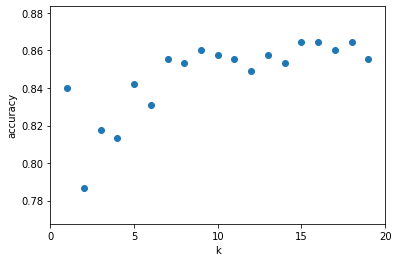

In [80]:
import matplotlib.pyplot as plt

k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

plt.show()

## Takeaways

- The model is good at correctly predicting the people from Arkansas and South Carolina.

- From 1 to 4 neighbors, there is a drop in accuracy, but at 5 it is back up to the accuracy of 1 neighbor.